In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

#(a)

In [ ]:
n_rows = 50000
n_columns = 8

# np.random.choice assumes uniform distribution by default
df = pd.DataFrame(np.random.choice(['a','b','c'], (n_rows, n_columns)),
                  columns=['S', 'T', 'U', 'V' ,'W', 'X', 'Y', 'Z'])

In [ ]:
df.head()

,S,T,U,V,W,X,Y,Z
0,a,b,a,b,b,c,a,c
1,a,a,a,c,b,c,c,a
2,b,b,b,b,a,b,a,a
3,b,c,a,c,a,b,b,c
4,a,b,b,b,a,c,a,c


#(b)

In [ ]:
print('Each category should have a % proportion of ~33 \n')

# checking each column works as intended
for column in df:
  print(df[column].value_counts(normalize=True)*100, '\n')

Each category should have a % proportion of ~33 

a    33.644
c    33.242
b    33.114
Name: S, dtype: float64 

c    33.422
b    33.406
a    33.172
Name: T, dtype: float64 

a    33.698
b    33.166
c    33.136
Name: U, dtype: float64 

b    33.506
a    33.298
c    33.196
Name: V, dtype: float64 

a    33.576
c    33.220
b    33.204
Name: W, dtype: float64 

a    33.468
b    33.306
c    33.226
Name: X, dtype: float64 

a    33.592
c    33.292
b    33.116
Name: Y, dtype: float64 

b    33.478
a    33.400
c    33.122
Name: Z, dtype: float64 



#(c)

In [ ]:
print('Unique number of rows possible:', 3**n_columns)

Unique number of rows possible: 6561


#(d)

In [ ]:
# generating counts of each unique permutation as a dataframe
freq_by_perm = df.value_counts().to_frame()

freq_by_perm = freq_by_perm[freq_by_perm[0] <= 12]

# generating frequency of permutation group size as a dataframe
freq_by_group_size = freq_by_perm.value_counts().to_frame().sort_index()

# formatting
freq_by_group_size = freq_by_group_size.rename(columns={0: 'No of Groups'})
freq_by_group_size = freq_by_group_size.reset_index(drop=False, inplace=False)
freq_by_group_size = freq_by_group_size.rename(columns={0: 'Group Size'})

print(freq_by_group_size.to_string(index=False))

 Group Size  No of Groups
          1            20
          2            91
          3           244
          4           465
          5           697
          6           844
          7           947
          8           896
          9           806
         10           577
         11           370
         12           275


Text(0, 0.5, 'No of Groups')

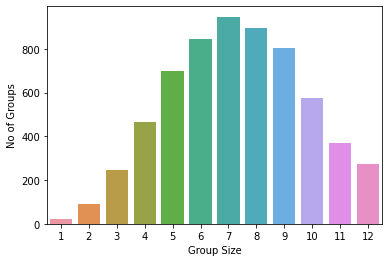

In [ ]:
freq_by_group_size = freq_by_group_size.rename(
                                            columns={'Group Size':'Group_Size',
                                            'No of Groups':'No_of_Groups'})
sns.barplot(x=freq_by_group_size.Group_Size, y=freq_by_group_size.No_of_Groups)
plt.xlabel("Group Size")
plt.ylabel('No of Groups')

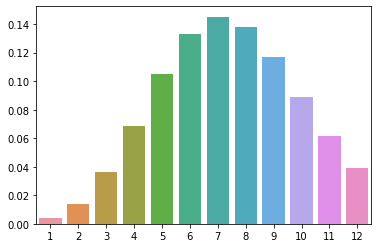

In [ ]:
# just checking it is binomial

from scipy.stats import binom

n=50000
p=1/6561

groups = list(range(1, 13))

# list of pmf values
dist = [binom.pmf(g, n, p) for g in groups]
# plotting the graph 
sns.barplot(x=groups, y=dist)

#(e)
Comment on the distribution of group sizes

From the graph above you can see the modal group size is 7 with the data forming a binomial distribution. It reaches near 0 frequency with unique permutations (groups of size 1).

#(f)

Small group sizes are of concern. This is especially so for unique combinations as these piece of data can only possibly refer to a specific individual. Small group sizes would also be of concern as potential insights could be gleamed, considering for example these groups had another variable attached containing important information.

#(g)
Missing data will change the distribution shifting the the average group size lower. It would be effectively changing n (number of samples) of the binomial distribution while keeping the probability the same as each row of data is independent.

#(h)
Imagine the code that you wrote for Part d) was to be deployed in an automated system
that Mirador’s customers could use independently, on potentially large volumes of their
own data. Describe how you might deploy the code, and what additional considerations
you might have or any changes to the code you might make.

Firstly the code would be written as a function with an appropriate name, doc strings. To add functionality variables would be added such as the limit on the size of groups. In order to handle potential errors I would add try except statements with appropriate error messages. Additionally I would spend time trying to refactor the code to run efficiently as possible to handle the potentially large volumes of data.